# <center> R4.04 Méthodes d'optimisation <br> TP3b - Interpolation polynomiale : le partage de secret </center>
<center> 2023/2024 - Tom Ferragut, Thibault Godin & Lucie Naert </center>
<center> IUT de Vannes, BUT Informatique </center>

Le but de ce TP est de présenter deux applications de l'interpolation polynôminale : le _partage de secret de Shamir_ et un exemple jouet de protocole de _correction d'erreurs_.

In [17]:
import numpy as np
import random

# Affichage graphique

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline

import itertools

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.colors as mcolors

names_col = list(mcolors.XKCD_COLORS)

import time

from collections import Counter



On rappelle le théorème central de l'interpolation :


<div class="alert alert-block alert-info"><b>Théorème</b> 
    
    
Soient $n$ points $(x_1,y_1), ..., (x_n,y_n)$ de $\mathbb{R}^2$ 

    
Alors il existe un unique polynôme $P_{(x_1,y_1), ..., (x_n,y_n)}$ de degré inférieur ou égal à $n-1$  tel que $P_{(x_1,y_1), ..., (x_n,y_n)}(x_i) = y_i$
   
</div>

Les fonctions suivantes permettent de faire une interpolation polynomiale par la méthode de Lagrange (voir TP3a). Plus précisément, à partir des coordonnées `X` et `Y` des noeuds d'interpolation, `pol_Lagrange(varX,X,Y)` calcule le polynome $P$ passant par tout les noeuds d'interpolation et renvoie $P(varX)$.

In [18]:

def pol_li(varX,i,X,Y):
    li=1
    for j in range(len(X)):
        if i!=j:
            li=li*((varX-X[j])/(X[i]-X[j]))
    return Y[i]*li



def pol_Lagrange(varX,X,Y):
    l=0
    for i in range(len(X)):
        l=l+pol_li(varX,i,X,Y)
        
    return np.round(l)

## Partage de secret : protocole de Shamir


Contexte : 
supposons qu'on veuille distribuer un secret $S$ (un nombre) à $m$ personnes $p_1, ..., p_m$

Le but est que 
- $n$ personnes (ou plus) peuvent connaître facilement le secret ($n\leq m$)
- $n-1$ personnes (ou moins) ne peuvent pas le découvrir (facilement)


L'approche par du Shamir Secret Sharing (SSS)  (simplifiée) est alors :

- partage : 
    - créer un polynôme $P$ de degré $n-1$ tel que $P(0)=S$ en tirant aléatoirement $n-1$ valeurs pour les $P(-k), k \in \{1,2,...,n-1\}$
    - attribuer à chaque personne $p_i$, $i \in \{1,2,...,m\}$, la valeur $s_i=P(i)$
- reconstruction :
    - si $n$ personne $p_{i_1}, ..., p_{i_n}$ créent le polynôme $Q$ interpolant $(i_1,s_{i_1}), ..., (i_n,s_{i_n})$, alors $Q=P$ et donc l'évaluation de ce polynôme en $0$ donne $S$
    
Les  $s_i$ sont appelés les sous-secrets.

Remarques : 
- La version [Wikipedia](https://fr.wikipedia.org/wiki/Partage_de_cl%C3%A9_secr%C3%A8te_de_Shamir) est un peu différente (mais pas plus compliquée) : on choisit au hasard les coefficients du polynome et non des points par lequel passe le polynome.
 
- Si k personnes se regroupent (k > n), le secret pourra quand même être retrouvé car il existe un unique polynome de degrès inf ou égal à k-1 passant par les k points : ce degrés est donc n-1. 

**Question 1** 

1. Écrire une fonction `partage(S,m,n)` avec $S$ le secret (un nombre), $m$ le nombre de personnes partageant le secret et $n$ le nombre de personnes nécessaires à la reconstruction du secret. Cette fonction renvoie la liste des $s_i$ pour $i$ allant de $1$ à $m$ ainsi que $X$ (vecteurs des absisses des noeuds d'interpolation) et $Y$ (vecteurs des ordonnées des noeuds d'interpolation). Attention : $X$ et $Y$ n'ont d'intérêts que pour la représentation graphique, ils ne devront pas être utilisés pour la reconstruction.

2. Remplir la légende du graphique

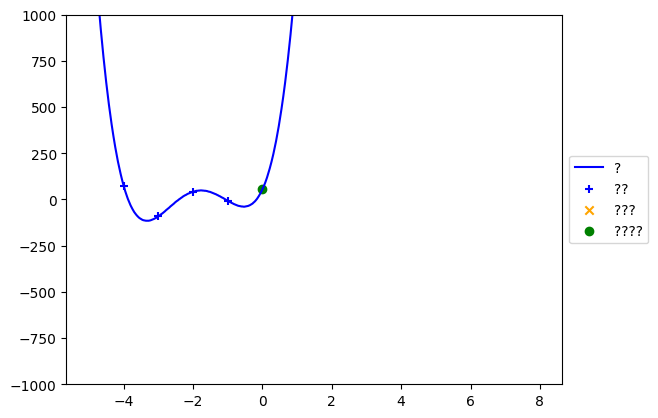

Voici les sous-secrets à partager :  [1293.0, 5544.0, 15417.0, 34293.0, 66325.0, 116438.0, 190329.0]
Ainsi, la personne 1 recevra le sous secret 1293.0


In [19]:
def partage(S, n, m):
  
    X = np.arange(0, -n, -1)


    Y = np.append([S], np.random.randint(-100, 100, n - 1))


    si = [pol_Lagrange(i, X, Y) for i in range(1, m + 1)]




    return X,Y,si

# Application

#secret 
S=55 

#nombre de personnes partageant le secret
m=7

#nombre de personnes necessaires à la reconstruction
n=5


X,Y,si = partage(S,n,m)


#Représentation graphique
tab_x=np.linspace(-n,m+1,500)
tab_yLagrange=pol_Lagrange(tab_x,X,Y)
pi = np.arange(1,m+1)# Entier de 1 à m inclus
plt.plot(tab_x,tab_yLagrange, color='blue', label ="?" )
plt.scatter(X,Y, color='blue', marker='+',label ="??")
plt.scatter(pi,si, color='orange', marker='x',label ="???")
plt.scatter(0,pol_Lagrange(0,X,Y), color='green', marker='o',label ="????")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-1000, 1000) #pour voir les détails des points pris au hasard
plt.show()

print("Voici les sous-secrets à partager : ", si)
print("Ainsi, la personne 1 recevra le sous secret", si[0])

**question 2**

1. Écrire une fonction `reconstruction(k,sk)` permettant de retrouver le secret. `k` est la liste des indices des personnes se rassemblant pour partager leur sous-secret ($k \subset \{1,2,...,m\}$). `sk` est la liste des sous-secrets (de même taille que `k`). 
2. Montrez que vous arrivez à retrouver le secret $S$ quand on a $n$ (ou plus) sous-secrets mais pas quand on en a moins.

In [20]:
def reconstruction(k,sk):
    return pol_Lagrange(0,k,sk)


S = 55
m = 10
n = 4
_,_,si = partage(S,n,m)


k=[1,3,4,5,9] #Choix d'indices entre 1 et m
sk = [si[x-1] for x in k] #Décalage des indices car numérotation python
print("Avec", len(k),"sous-secrets, le secret trouvé est",reconstruction(k,sk))

Avec 5 sous-secrets, le secret trouvé est 55.0


**activité**

À l'aide de ce protocole, partager un secret à 6 de vos camarades de manières à ce qu'il faille au moins 3 d'entre-eux pour le reconstruire.


----

## Suréchantillonage et introduction aux codes de Reed-Solomon


Le but de cette partie est de vous donner un protocole de correction d'erreur qui peut-être vu comme une (grosse) simplification des codes de Reed-Solomon.

Le principe est le suivant :

On veut transmettre un message de $k$ lettres (nombres entiers) $m_0,...,m_{k-1} $ sur un canal bruité.

Pour cela, on va transmettre les $k$ lettres plus $t$ lettres supplémentaires $r_0,...,r_{t-1}$, construites comme suit :
- on calcule le polynôme d'interpolation $P=P_{(0,m_0),...,(k-1,m_{k-1})}$ 
- $r_i = P(k+i)$
    
    
On transmet le vecteur $[m_0,...,m_{k-1},r_0,...,r_{t-1}]$



**question 3**

1. Écrire une fonction `lettreSup(t,xm,m)` calculant `r` les $t$ lettres supplémentaires ainsi que `xr` leur indice (les $t$ abscisses des lettres supplémentaires).
2. Compléter la légende de la représentation graphique  

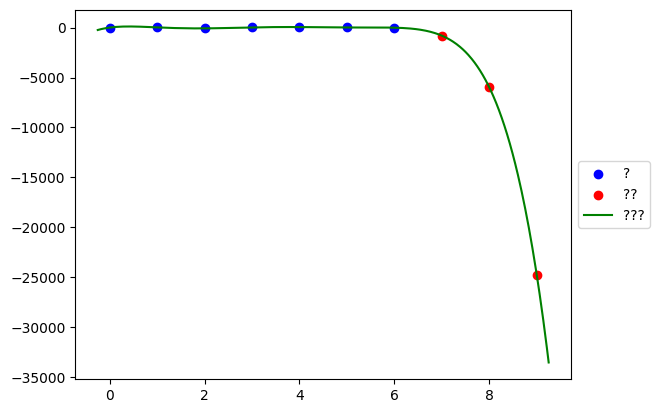

In [21]:
def lettreSup(t, xm, m):
    xr = np.arange(t) + len(xm)
    r = pol_Lagrange(xr, xm, m)

    return xr, r



k=7
t=3

xm=np.arange(k) 
m=random.sample(range(-100, 100), k)

xr,r = lettreSup(t, xm, m)

#tracé
plt.scatter(xm,m, color='blue', label = "?")
plt.scatter(xr,r, color='red', label = "??")

xcont=np.linspace(-.25,k+t-0.75,500)
plt.plot(xcont,pol_Lagrange(xcont,xm,m), color='green', label ="???")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

La détection d'erreur se fait en évaluant tous les polynômes $Q_S$ interpolant un sous-ensemble $S$ de taille $k$ : $S \subset \{(0,m_0),...,(k-1,m_{k-1}),(k,r_0),...,(k+t-1,r_{t-1})\}$


Si toutes les valeurs $Q_s(i) , i \in \{0,...,k+t-1\}$ s'accordent, alors il n'y a (très très probablement) pas d'erreur.


**question 4**

1. Écrire une fonction `detectErreur(k,yt)` où k est le nombre de lettres du message et `yt` est la liste complète des lettres ($[m_0,...,m_{k-1},r_0,...,r_{t-1}]$). Cette fonction renvoie `True` s'il y a une erreur dans le message et `False` s'il n'y a (très très probablement) pas d'erreur.

_Astuce python_ : on pourra utiliser `list_s= list(itertools.combinations(...))` pour construire les sous-ensembles.

2. Compléter la légende de la représentation graphique

In [22]:


def detectErreur(k, yt):
    xt = np.arange(len(yt))
    list_s= list(itertools.combinations(xt, k))
    res=[]
    i = 0
    erreur = False
    for s in list_s: #on pourrait s'arreter avant mais res servira peut-être ensuite...
        s= list(s)
        resPol = list(pol_Lagrange(xt,s,yt[s]))
        if(resPol not in res):
            res.append(resPol); 
    if len(res) >  1: 
        erreur = True
    return erreur, res


k = 7
t = 3
xm = np.arange(k)
m = random.sample(range(-10, 10), k)
_,r = lettreSup(t, xm, m)
yt = np.append(m, r)
yt = np.asarray(yt)

print("Erreur de transmission :", detectErreur(k, yt)[0])

#Rajout d'erreurs
yError = yt.copy()
print(yError)
yError[1] = 0
yError[4] = 0 
print(yError)
print("Erreur de transmission :", detectErreur(k, yError)[0])


Erreur de transmission : False
[  6.   9.   4.   2.   0. -19. -86.]
[  6.   0.   4.   2.   0. -19. -86.]
Erreur de transmission : True


ValueError: x and y must be the same size

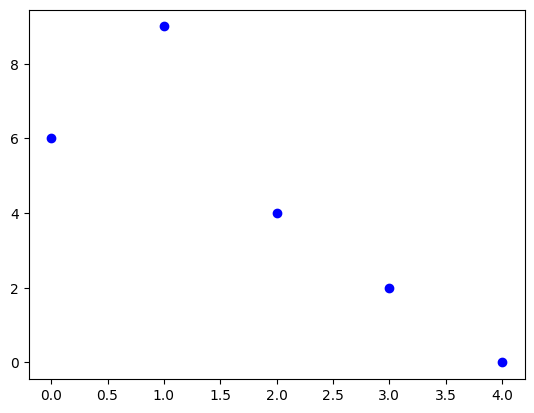

In [23]:
#Représentation graphique

xcont=np.linspace(-.25,len(yt)-0.75,500)
plt.scatter(xm,m, color='blue', label = "?")
plt.scatter(xr,r, color='red', label = "??")
plt.plot(xcont,pol_Lagrange(xcont,xm,m), color='green', label ="???")

error = detectErreur(k, yError)
if(error):
    xt = np.arange(len(yt))
    list_s= list(itertools.combinations(xt, k))
    s0 = list(list_s[0])
    s1 = list(list_s[4])
    print(s0)
    plt.plot(xcont,pol_Lagrange(xcont,s0,yError[s0]), color='red', label ="????")
    plt.plot(xcont,pol_Lagrange(xcont,s1,yError[s1]), color='red', linestyle = '--', label = "?????")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

La correction d'erreurs est plus subtile.

**question 5**

Observer ce qui se passe quand on a 1 erreur de transmission. Proposer une fonction de correction en cas d'erreur


_python_ on pourra utiliser `sub= list(itertools.combinations(...))` pour construire les sous-ensembles et `from collections import Counter` pour compter les valeurs

In [ ]:
def correctErreur(k, yt):
    erreur, res = detectErreur(k, yt)
    if(erreur):
        # res map contains as key the full polynomial and as value the number of occurences
        res_map = Counter()

        combinaison = itertools.combinations(range(len(yt)), k)
        for c in combinaison:
            c = list(c)
            pol = []

            for i in range(k):
                pol.append(pol_Lagrange(i, c, yt[c]))

            res_map[tuple(pol)] += 1

        # print most common polynomial
        most_common = res_map.most_common(1)[0][0]

        print(most_common)

        return most_common

 

    return yt

    
    
k = 5
t = 2
xm = np.arange(k)
m = [6, 9, 4, 2, 0]
_,r = lettreSup(t, xm, m)
yt = np.append(m, r)
yt = np.asarray(yt)
correctErreur(k,yt)

yError = yt.copy()
yError[1] = 0
print("Message avec erreur :", yError)
print("Message initial : ", yt)
print("Message corrigé : ", correctErreur(k,yError))


Message avec erreur : [-9.000e+01  0.000e+00 -2.200e+01 -3.000e+00 -1.700e+01 -5.200e+01
  6.300e+01  1.270e+02 -1.516e+03 -9.612e+03]
Message initial :  [-9.000e+01  5.200e+01 -2.200e+01 -3.000e+00 -1.700e+01 -5.200e+01
  6.300e+01  1.270e+02 -1.516e+03 -9.612e+03]
(-90.0, 52.0, -22.0, -3.0, -17.0, -52.0, 63.0)
Message corrigé :  (-90.0, 52.0, -22.0, -3.0, -17.0, -52.0, 63.0)


In [ ]:
print(pol_Lagrange(1, [0,1,2], [1,2,3]))

2.0
